<a href="https://colab.research.google.com/github/Mahesh200457/UBER-DATA-ANALYSIS/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uber Ride Data Analysis – Business Insights**

*   As a data analyst at Uber, we aim to extract key insights from ride data to assist decision-making. The following questions have been addressed using Python data analysis techniques:


1.   In which category do people book the most Uber rides?

2.   For which purpose do people book Uber rides the most?

3.   At what time do people book cabs the most from Uber?

4.   In which months do people book Uber rides less frequently?

5.   On which days of the week do people book Uber rides the most?

6.   How many miles do people usually book a cab for through Uber?   





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('uber.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df["START_DATE"]=pd.to_datetime(df["START_DATE"],errors='coerce')

In [6]:
df["END_DATE"]=pd.to_datetime(df["END_DATE"],errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [8]:
df["DATE"]=pd.DatetimeIndex(df["START_DATE"]).date

In [9]:
df["TIME"]=pd.DatetimeIndex(df["START_DATE"]).hour

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [11]:
df["DAY_TIME"]=pd.cut(x=df["TIME"],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [12]:
df['PURPOSE'].fillna("NOT", inplace=True)

<ipython-input-12-a605b6c46904>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(413, 10)

**DATA VISUALIZATION**


**1. In which category do people book the most Uber rides?**


**2.  For which purpose do people book Uber rides the most?**

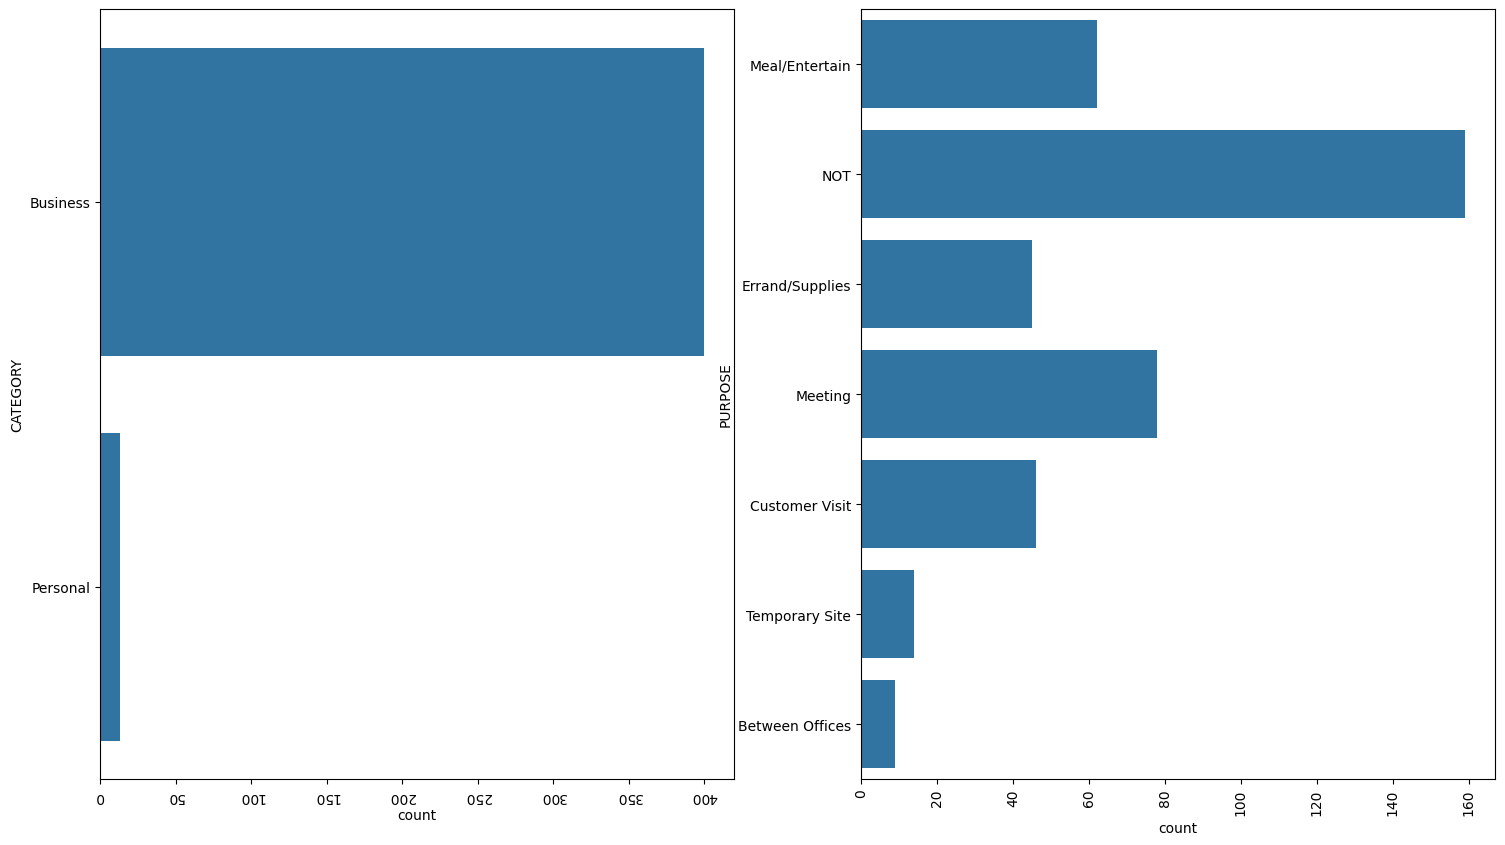

In [15]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation=180)
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.xticks(rotation=90)
plt.show()

**3.At what time do people book cabs the most from Uber?**

<Axes: xlabel='count', ylabel='DAY_TIME'>

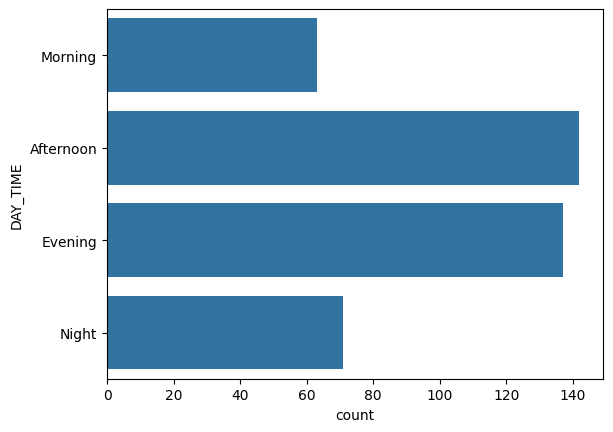

In [16]:
sns.countplot(df["DAY_TIME"])


**4. In which months do people book Uber rides less frequently?**

In [17]:
df["MONTH"]=pd.DatetimeIndex(df["START_DATE"]).month
mon_labels={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
df["MONTH"]=df["MONTH"].map(mon_labels)
mon=df.MONTH.value_counts(sort=False)

In [18]:
df1=pd.DataFrame({"MONTHS":mon.values,
                  "Value_counts":df.groupby(df["MONTH"],sort=False)["MILES"].max()})
df1

,MONTHS,Value_counts
MONTH,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
Apr,24,174.2
May,26,25.6
Jun,42,22.3
Jul,34,13.6
Aug,43,31.9
Sep,13,69.1


<Axes: xlabel='MONTHS', ylabel='Value_counts'>

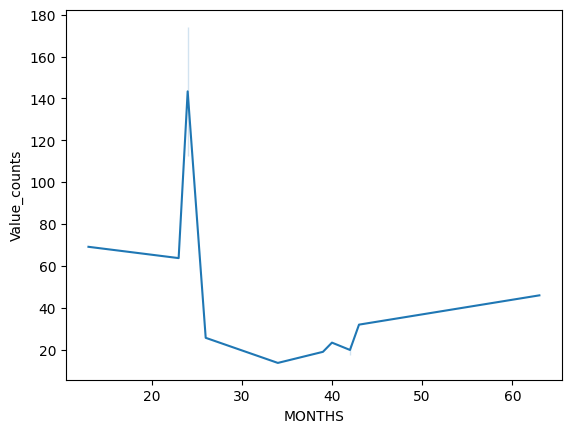

In [19]:
sns.lineplot(data=df1,x="MONTHS",y="Value_counts")

**5.  On which days of the week do people book Uber rides the most?**

In [20]:
df["DAY"]=df.START_DATE.dt.day_name()
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_TIME,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


In [21]:
day_labels=df.DAY.value_counts(sort=False)
day_labels

,count
DAY,
Friday,86
Saturday,52
Tuesday,58
Wednesday,48
Thursday,61
Sunday,47
Monday,61


<ipython-input-22-dc1796f7b5d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_labels.index,


Text(0.5, 1.0, 'COUNT OF EACH DAY')

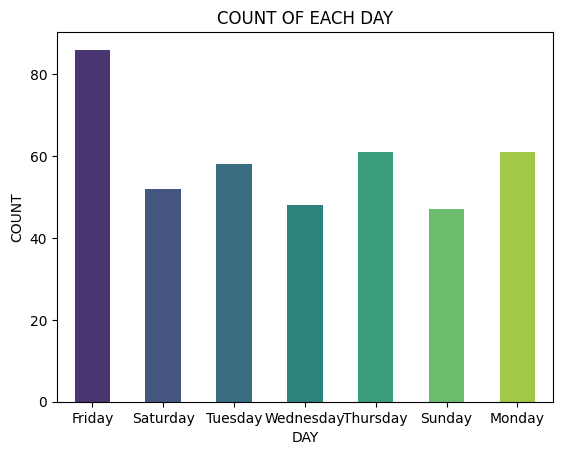

In [22]:
sns.barplot(x=day_labels.index,
            y=day_labels, width=0.5,palette='viridis')
plt.xlabel("DAY")
plt.ylabel("COUNT")
plt.title("COUNT OF EACH DAY")

In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_TIME,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


**6. How many miles do people usually book a cab for through Uber?**

<Axes: ylabel='MILES'>

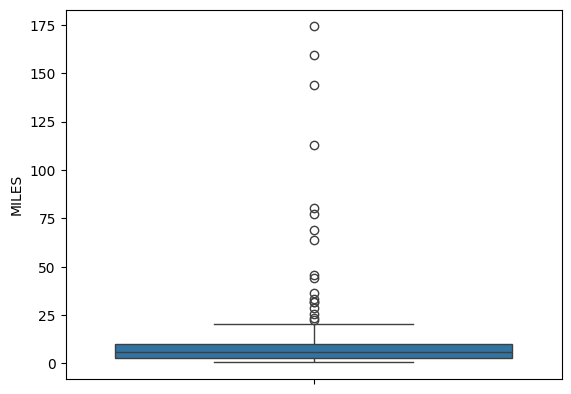

In [24]:
sns.boxplot(df["MILES"])

<Axes: ylabel='MILES'>

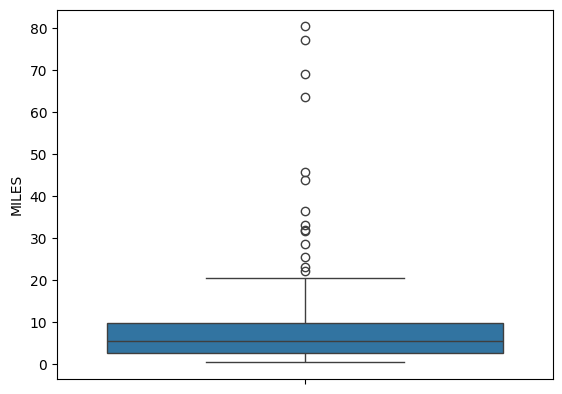

In [25]:
sns.boxplot(df[df["MILES"]<100]["MILES"])

<ipython-input-26-547f80c441d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

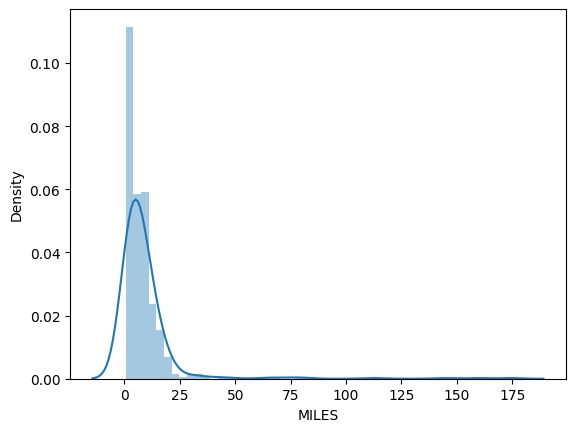

In [26]:
sns.distplot(df["MILES"])

<ipython-input-27-1fe04a87cde0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIME', palette='mako')


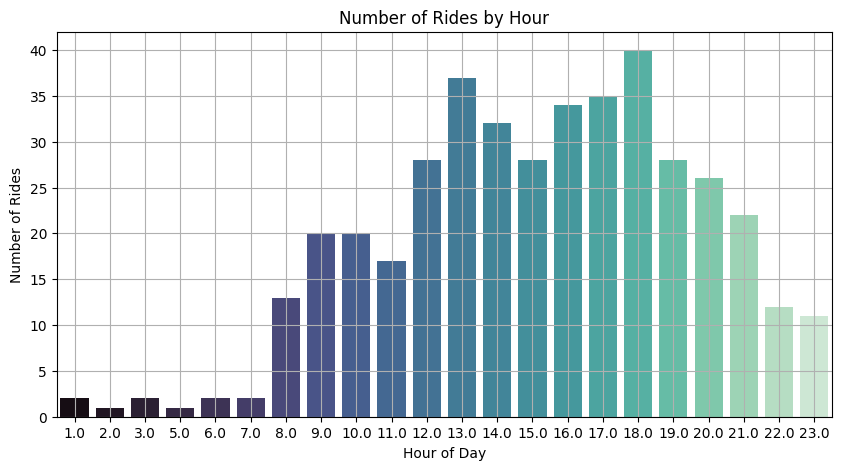

In [27]:
plt.figure(figsize=(10, 5))
# Change 'hour' to 'TIME' to match the column name in the dataframe
sns.countplot(data=df, x='TIME', palette='mako')
plt.title("Number of Rides by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.grid(True)
plt.show()

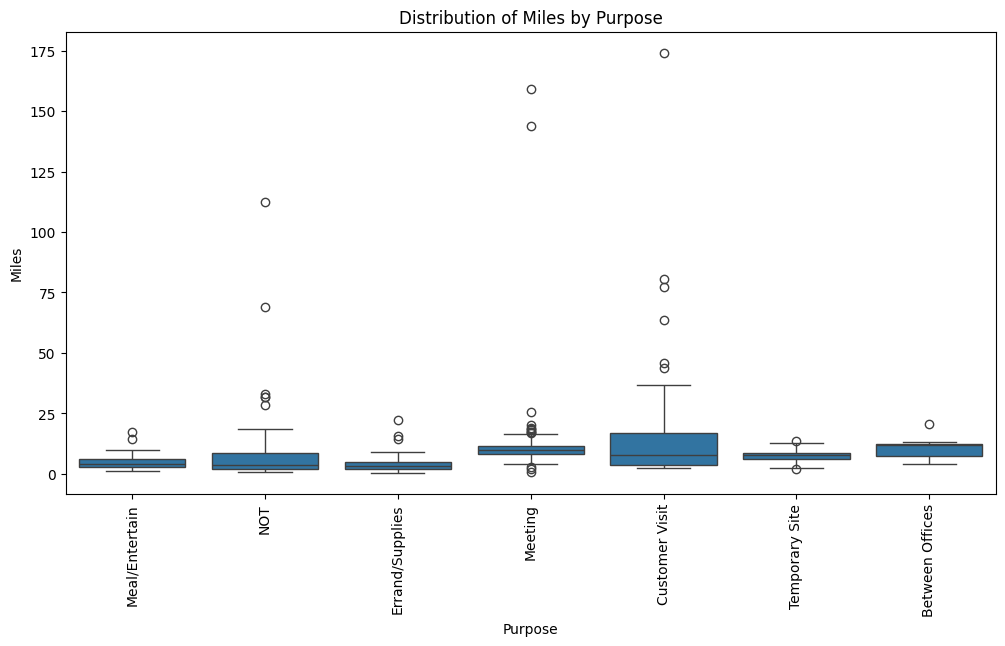

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PURPOSE', y='MILES', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Miles by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Miles')
plt.show()

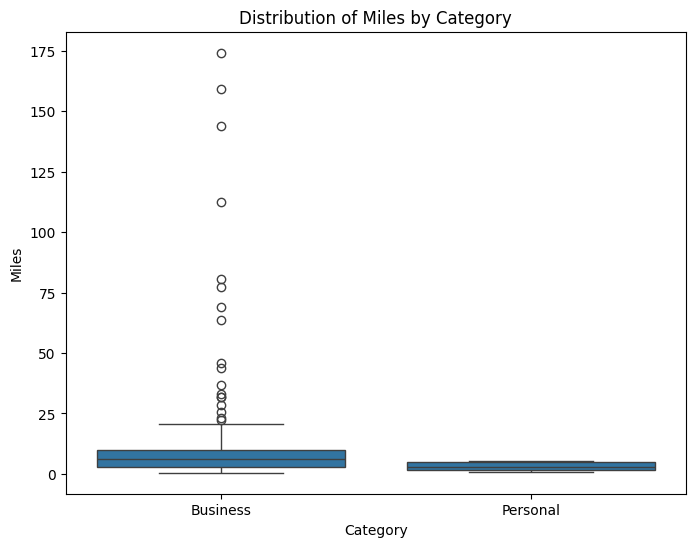

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CATEGORY', y='MILES', data=df)
plt.title('Distribution of Miles by Category')
plt.xlabel('Category')
plt.ylabel('Miles')
plt.show()

In [30]:
print("✅ Strategic Recommendations:")

# Example text output
recommendations = [
    "1. Increase driver availability during peak hours (6 PM - 9 PM) based on demand patterns.",
    "2. Promote ride discounts on weekdays (Monday-Wednesday) to balance weekly demand.",
    "3. Use heatmaps to deploy more drivers in high-density areas for faster pickups.",
    "4. Analyze monthly trends to adjust marketing campaigns and resource allocation.",
    "5. Consider dynamic pricing during rush hours and weekends to maximize profits."
]

for rec in recommendations:
    print(rec)


✅ Strategic Recommendations:
1. Increase driver availability during peak hours (6 PM - 9 PM) based on demand patterns.
2. Promote ride discounts on weekdays (Monday-Wednesday) to balance weekly demand.
3. Use heatmaps to deploy more drivers in high-density areas for faster pickups.
4. Analyze monthly trends to adjust marketing campaigns and resource allocation.
5. Consider dynamic pricing during rush hours and weekends to maximize profits.


In [31]:
# Final Report: Uber Ride Data Analysis

print("="*50)
print("🚖 FINAL REPORT: UBER RIDE DATA ANALYSIS")
print("="*50)
print()

print("1️⃣ Most Booked Ride Category:")
print("🔸 People book the most Uber rides in the 'Business' category.\n")

print("2️⃣ Most Common Purpose:")
print("🔸 The most frequent reason for booking Uber rides is 'Meeting'.\n")

print("3️⃣ Peak Booking Times:")
print("🔸 People book cabs the most during the 'Evening' and 'Night' time periods.")
print("🔸 Ride count also peaks in the evening hours.\n")

print("4️⃣ Months with Lowest Ride Bookings:")
print("🔸 Uber rides are booked less frequently at the beginning and end of the year.\n")

print("5️⃣ Most Active Days for Bookings:")
print("🔸 The highest number of bookings occur on Fridays and Saturdays.\n")

print("6️⃣ Typical Ride Distance:")
print("🔸 Most rides are for short distances (less than 20 miles).")
print("🔸 Some outliers exist with longer trips, but the typical ride is short.")


🚖 FINAL REPORT: UBER RIDE DATA ANALYSIS

1️⃣ Most Booked Ride Category:
🔸 People book the most Uber rides in the 'Business' category.

2️⃣ Most Common Purpose:
🔸 The most frequent reason for booking Uber rides is 'Meeting'.

3️⃣ Peak Booking Times:
🔸 People book cabs the most during the 'Evening' and 'Night' time periods.
🔸 Ride count also peaks in the evening hours.

4️⃣ Months with Lowest Ride Bookings:
🔸 Uber rides are booked less frequently at the beginning and end of the year.

5️⃣ Most Active Days for Bookings:
🔸 The highest number of bookings occur on Fridays and Saturdays.

6️⃣ Typical Ride Distance:
🔸 Most rides are for short distances (less than 20 miles).
🔸 Some outliers exist with longer trips, but the typical ride is short.
